## Apparel-Platform-Performance Regression Analysis

* Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions.
* Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website

## Imports

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 150  #setting dpi to 150

## Get the Data

Working with Ecommerce Customers csv file from the company.

Present numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [477]:

df = pd.read_csv('Ecommerce Customers', header = 0, index_col = 0)


**Check the head of customers, and checking out its info() and describe():**

In [479]:
df.head()

,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Email,,,,,,,
mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, mstephenson@fernandez.com to hannahwilson@davidson.com
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Address               500 non-null    object 
 1   Avatar                500 non-null    object 
 2   Avg. Session Length   500 non-null    float64
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 31.2+ KB


In [481]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis


___
**Checking out the correlations and then plotting out few relevant plots:**

In [483]:
correl = df.corr(numeric_only = True)
correl

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000




**Joint Plot between "Time on Website" and "Yearly Amount Spent":**

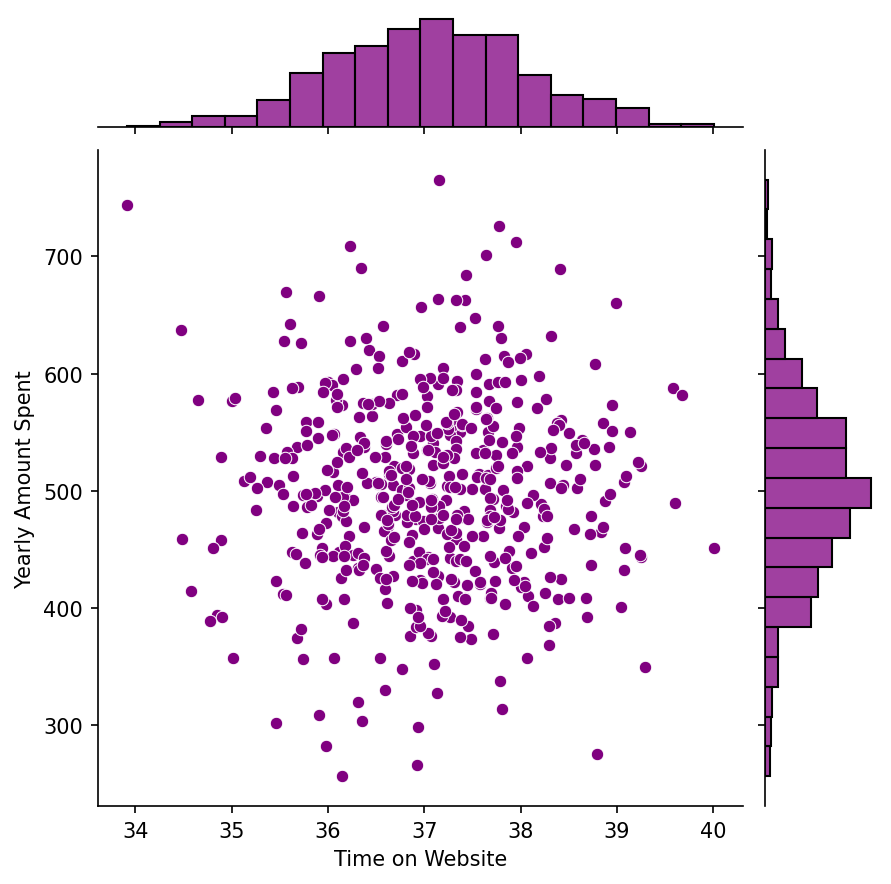

In [485]:
#Correlation value between Yearly Amount spent & Time on Website : -0.002641

sns.jointplot(x = df['Time on Website'], y = df['Yearly Amount Spent'], color = 'purple')

plt.show()


**Joint Plot between "Time on App" and "Yearly Amount Spent":**

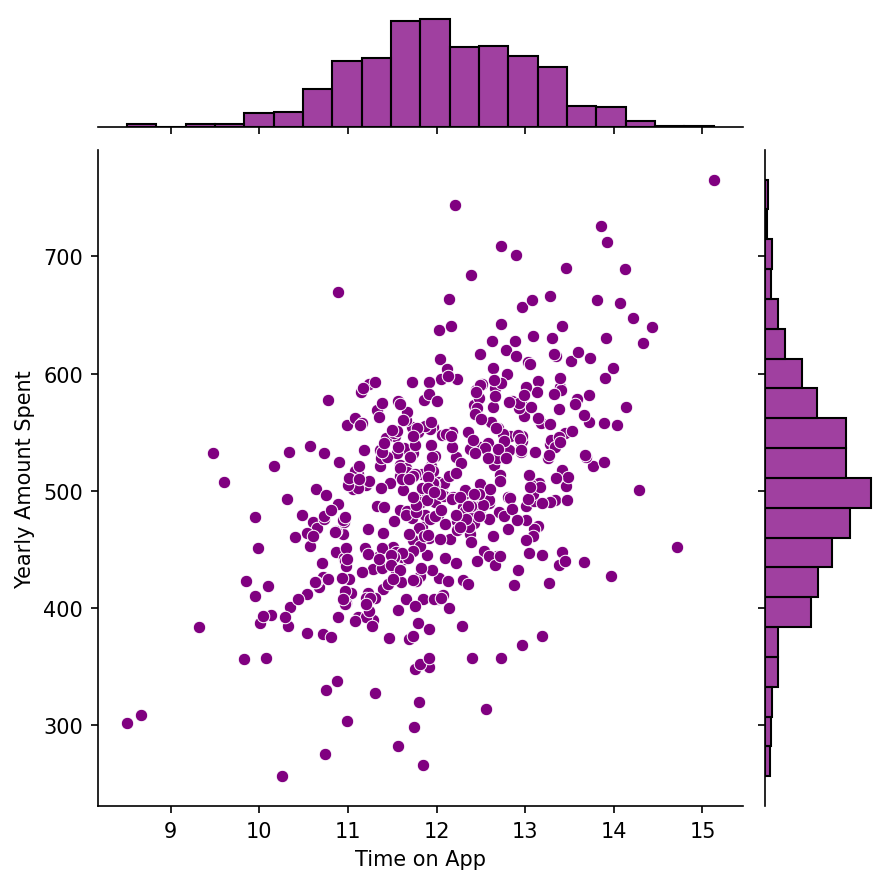

In [487]:
sns.jointplot(x = df['Time on App'], y= df['Yearly Amount Spent'], color = 'Purple')

plt.show()

**Using jointplot to create a 2D hex bin plot comparing "Time on App" and "Length of Membership":**

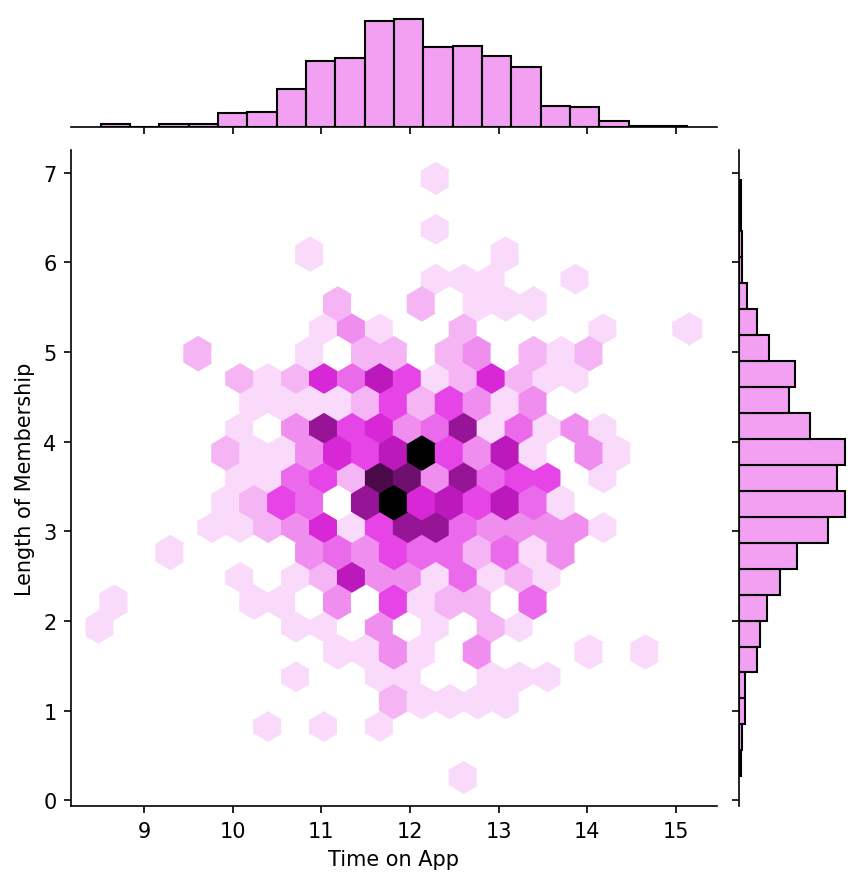

In [489]:
sns.jointplot(kind = 'hex', x = df['Time on App'], y = df['Length of Membership'], color = 'violet' )

plt.show()

**Exploring relationships between entire dataset:**

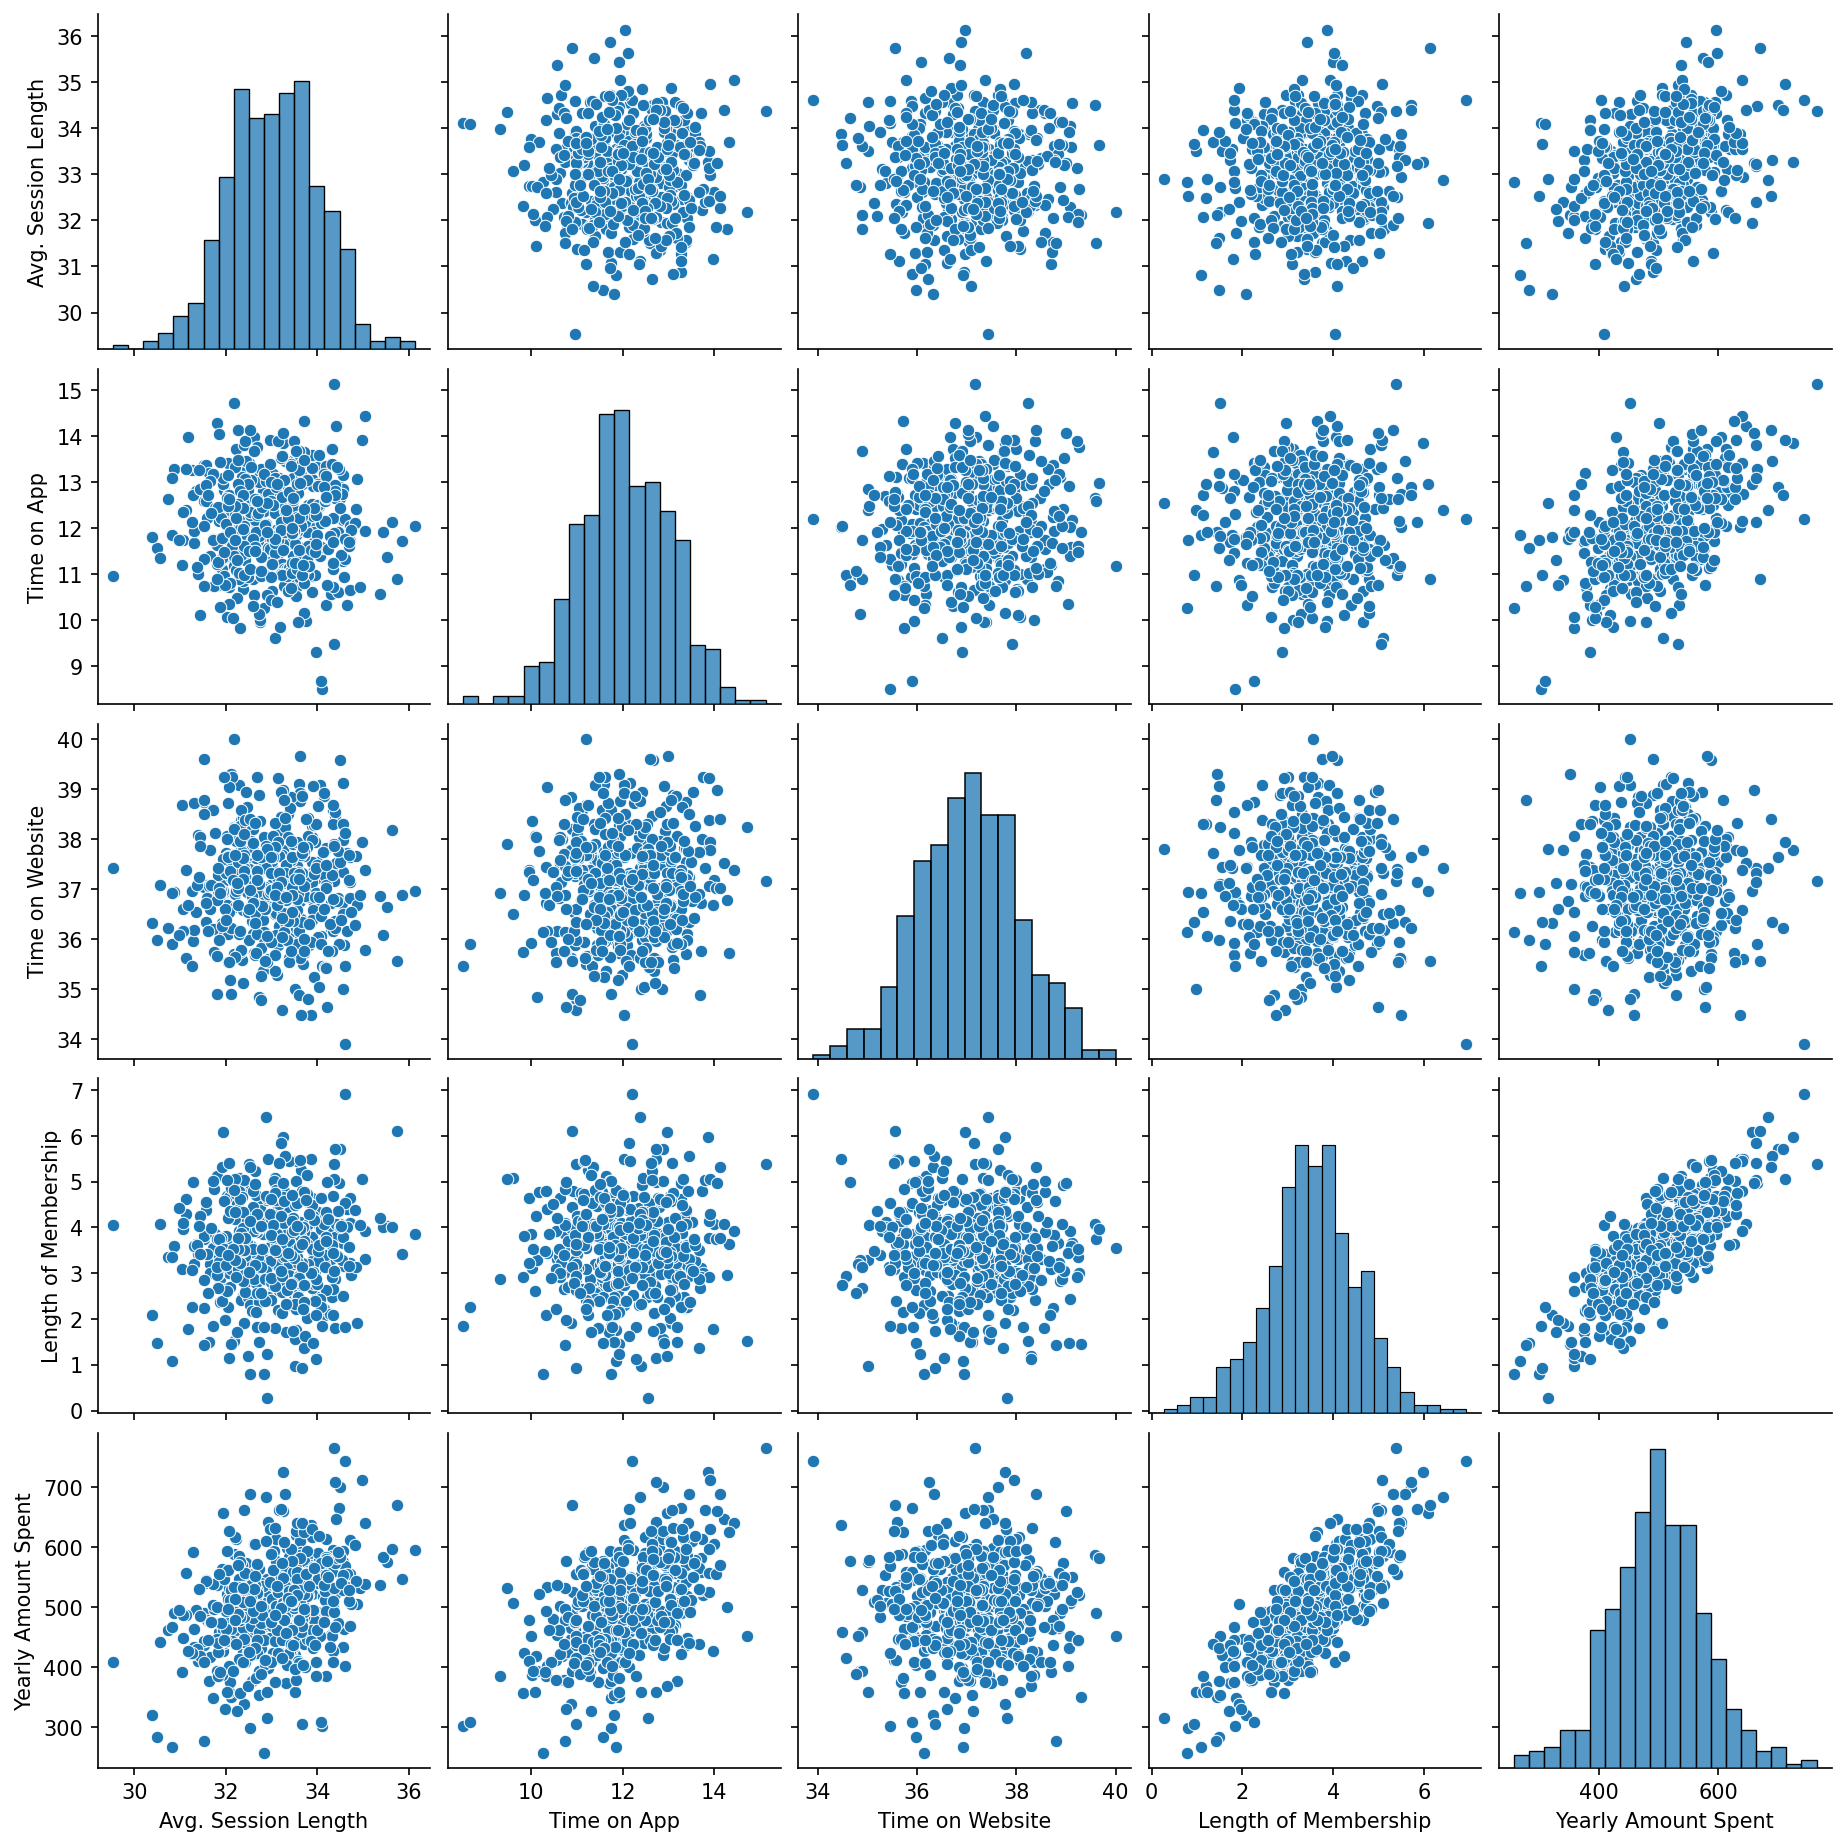

In [491]:
sns.pairplot(df)

plt.show()

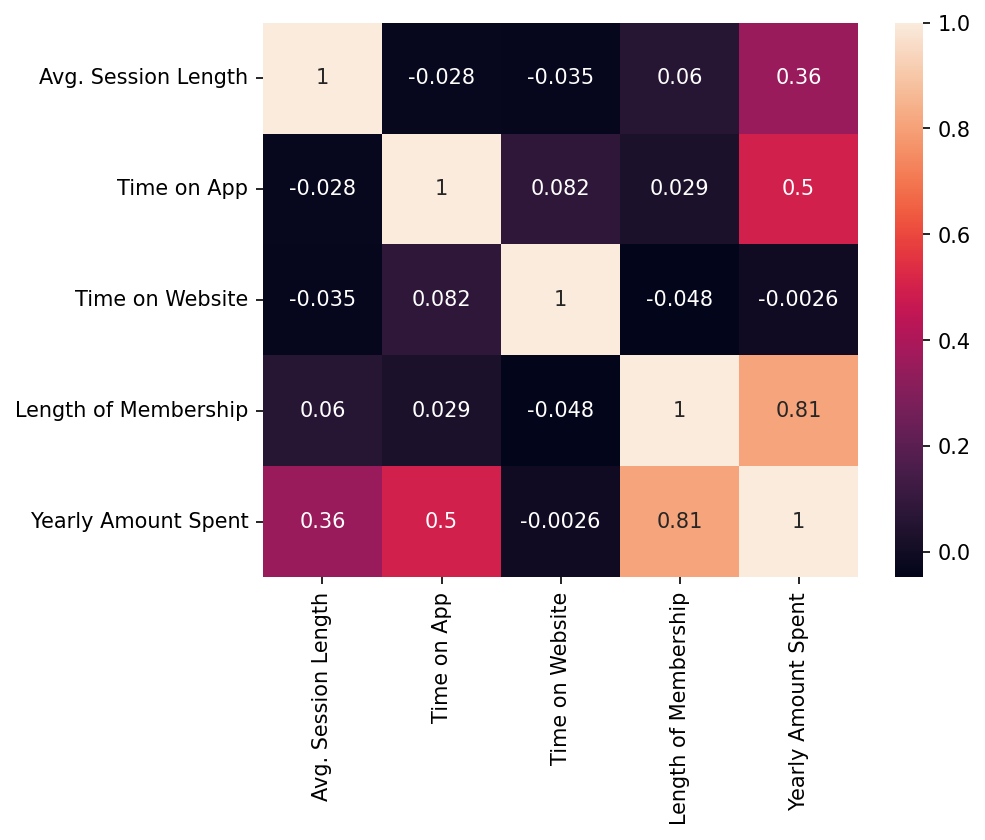

In [492]:
sns.heatmap(correl, annot = True)

plt.show()

**What seems to be more correlated feature with "Yearly Amount Spent" ?**
* Answer: Length of Membership

**Create a linear model plot of "Yearly Amount Spent" vs. "Length of Membership":**

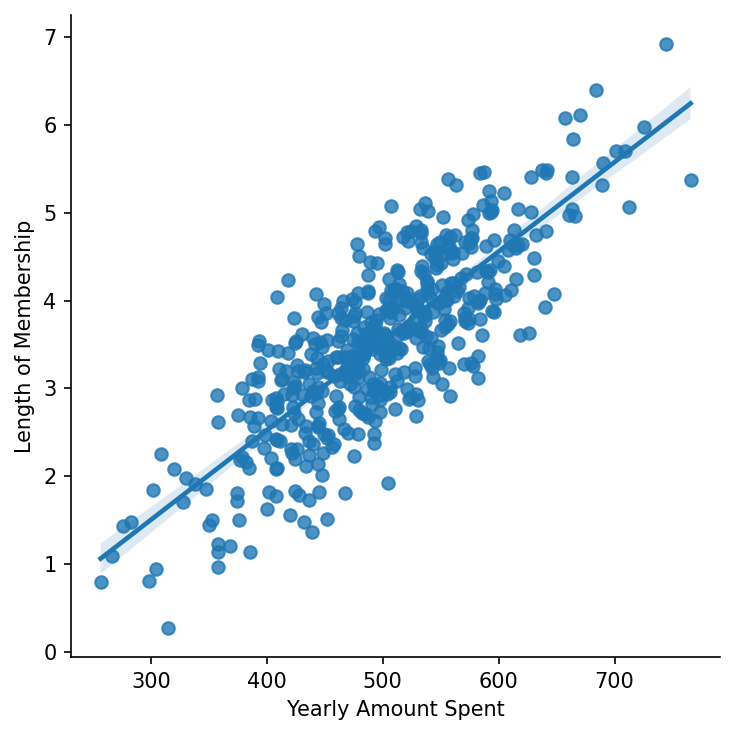

In [495]:
sns.lmplot(x = 'Yearly Amount Spent', y = 'Length of Membership', data = df)

plt.show()

## Declaring the X and Y Arrays

**Setting variable X equal to the numerical features and a variable y equal to the "Yearly Amount Spent" column:**

In [497]:
#extracting all names of columns
df.columns

# Here "address" and "avatar" feature are not useful as their datatype is Object

Index(['Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [498]:
#Declaring x and y arrays:

x = df[['Avg. Session Length' , 'Time on App' , 'Time on Website' , 'Length of Membership']]
y = df['Yearly Amount Spent']

## Train Test Split (Test size : 30%)

In [500]:
from sklearn.model_selection import train_test_split

In [501]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

## Training the Model

**Import LinearRegression from sklearn.linear_model:**

In [503]:
from sklearn.linear_model import LinearRegression

In [504]:
lm = LinearRegression()

**Training model on the training data:**

In [506]:
lm.fit(x_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [508]:
print('Coefficients of Model:' ,lm.coef_)

Coefficients of Model: [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

**Predict the Yearly Amount spent (i.e. y_test), using X_test set of the data:**

In [510]:
predictions = lm.predict(x_test)

**Creating a scatterplot of the real test values versus the predicted values of Yearly Amount Spent:**

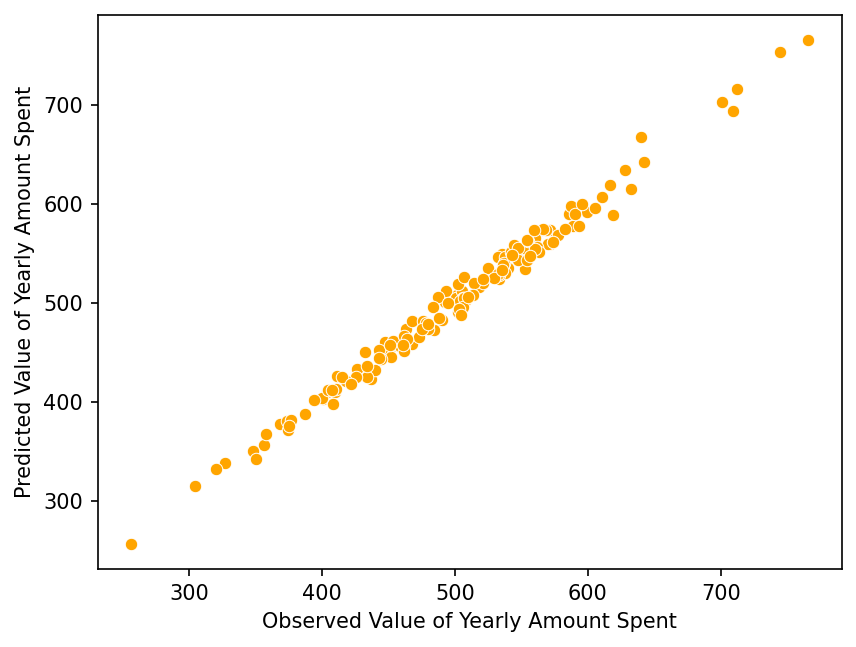

In [512]:
sns.scatterplot(x = y_test, y = predictions, color = 'orange')
plt.xlabel('Observed Value of Yearly Amount Spent')
plt.ylabel('Predicted Value of Yearly Amount Spent')

plt.show()

## Evaluating the Model

In [514]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(predictions, y_test))
print('MSE:', metrics.mean_squared_error(predictions, y_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(predictions, y_test)))

MAE: 7.228148653430815
MSE: 79.81305165097409
RMSE 8.933815066978614


## Residuals
****Plotting a histogram of the residuals and making sure it looks normally distributed:****

/var/folders/8v/bkbfj8z54k5fmfsw_vnhvspc0000gn/T/ipykernel_34419/1716254800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


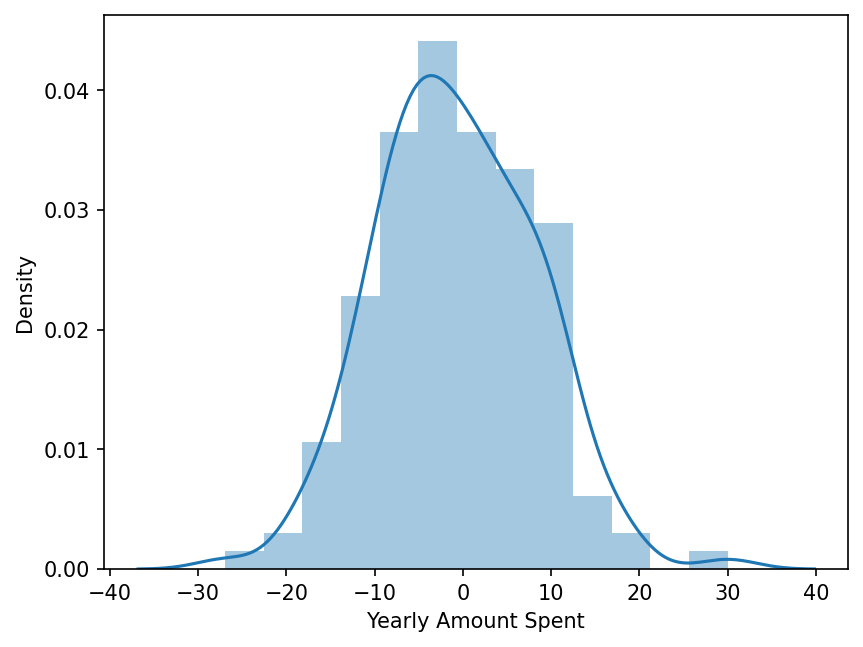

In [516]:
sns.distplot((y_test-predictions))
plt.show()

#this is approxly a normal distribution, thus model is working good with our current set of problem...

## Conclusion

In [518]:
coefficients = pd.DataFrame(index = x.columns, data = lm.coef_, columns = ['Value of Coefficients'])
coefficients

,Value of Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Interpretting these coefficients?**



- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Conclusive Question: Should company focus more on their mobile app or on their website?**
* Conclusion: There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better.

---